## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 1

**Student Name:**    `Jiahao Chen`

**Student ID:**     `1118749`

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a written report explaining your results at the **Assignment 1** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Mapping between world and image coordinates
Note: Writing code for this question is optional. However, if you do not include code here you *must* show your computation steps in your written report.

In [1]:
# Calculate the height of the whole scene in the real world

# Height of imaging sensor
yi = 16.32
# Distance between camera and the scene
z = 56.35 * 1000
# Focal length of the camera
f = 194

# Pinhole projection
# Height of scene
y = yi / (f / z)
print(f"Actual height of scene: {round(y /1000, 2)} m")

Actual height of scene: 4.74 m


In [2]:
# Calculate the height of the statue in the real world

from PIL import Image

path = "images/Asst1_1_image.png"
statue_image = Image.open(path)
pixels = statue_image.load()

# Compute the proportion of height of the statue in the image
limit = 3
count = 0
statue_red = []
# Find the red lines in image which represent top and bottom of the statue
for i in range(statue_image.width):
    for j in range(statue_image.height):
        if pixels[i, j] == (255, 0, 0):
            statue_red.append(j)
            count += 1
        if count == limit:
            break

statue_ratio = (statue_red[2] - statue_red[0]) / statue_image.height
print(f"Proportion: {round(statue_ratio, 2)}")
print(f"Height of statue: {round(y * statue_ratio / 1000, 2)} m")

Proportion: 0.66
Height of statue: 3.12 m


### 2. Thinking with filters

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

maze1_path = "images/Asst1_2_maze1.png"
maze2_path = "images/Asst1_2_maze2.png"

In [4]:
# Task 1 - Detect intersections

def count_intersections(image_path):
    # Read image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image so that walls in maze are one pixel wide
    image_height, image_width = image.shape
    new_height = image_height // 2
    new_width = image_width // 2
    maze = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
    plt.subplot(1, 2, 1)
    plt.imshow(maze, cmap='gray') 
    plt.title('Resize image')
    plt.axis('off')
    
    # Use the following the kernel to filter the maze
    # Intersections will be highlighted as white and the rest are black
    kernel = np.array([[1, -2,  1],
                       [-2, 0, -2],
                       [1, -2,  1]])
    intersections = cv2.filter2D(maze, -1, kernel)
    plt.subplot(1, 2, 2)
    plt.imshow(intersections, cmap='gray') 
    plt.title('Filtering')
    plt.axis('off')
    
    return len(np.argwhere(intersections == 255))

Number of intersections in maze1: 87


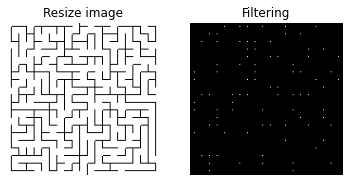

In [5]:
print(f"Number of intersections in maze1: {count_intersections(maze1_path)}")

Number of intersections in maze2: 71


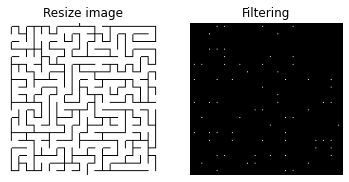

In [6]:
print(f"Number of intersections in maze2: {count_intersections(maze2_path)}")

In [7]:
# Task 2 - Detect dead ends

def count_deadends(image_path):
    # Read image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image so that walls in maze are one pixel wide
    image_height, image_width = image.shape
    new_height = image_height // 2
    new_width = image_width // 2
    maze = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
    plt.subplot(1, 3, 1)
    plt.imshow(maze, cmap='gray') 
    plt.title('Resize image')
    plt.axis('off')
    
    # Use the following the kernel to filter the maze
    # Dead ends will be composed of 2 pixels with value 0f 178
    # Other pixels of walls will be greater than 178
    kernel = np.array([[1, -1.1, 1],
                       [-1.1, 0, -1.1],
                       [1, -1.1, 1]])
    filtered = cv2.filter2D(maze, -1, kernel)
    plt.subplot(1, 3, 2)
    plt.imshow(filtered, cmap='gray') 
    plt.title('Filtering')
    plt.axis('off')
    
    # All pixels greater than 178 will be converted to zero
    # The rest pixels represent dead ends
    threshold, deadends = cv2.threshold(filtered, 178, 255, cv2.THRESH_TOZERO_INV)
    plt.subplot(1, 3, 3)
    plt.imshow(deadends, cmap='gray') 
    plt.title('Threshold')
    plt.axis('off')
    
    # Since each dead end is represented by 2 pixels with value of 178, the count need to be divided by 2.
    return len(np.argwhere(deadends == 178)) // 2

Number of dead ends in maze1: 98


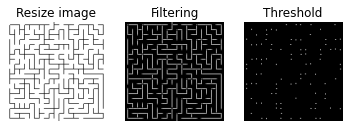

In [8]:
print(f"Number of dead ends in maze1: {count_deadends(maze1_path)}")

Number of dead ends in maze2: 74


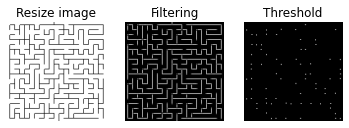

In [9]:
print(f"Number of dead ends in maze2: {count_deadends(maze2_path)}")